In [277]:
import konlpy

In [278]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 확인

In [279]:
dic = pd.read_csv('./data/cleaning.csv',encoding = 'UTF-8-sig')
dic[:5]

,Column1,Column2,열1
0,https://zuminternet.github.io/Zum-Chrome-Exten...,크롬 확장프로그램 개발⛏️ 회고,NaN
1,https://www.twitch.tv/frog135,게구리 - Twitch,1.0
2,https://docs.google.com/document/d/100AEt7rqVb...,시종설제안서 - Google Docs,5.0
3,https://docs.google.com/document/u/1/d/100AEt7...,시종설제안서 - Google Docs,5.0
4,https://www.twitch.tv/akaros83,AKaros83 - Twitch,1.0


In [280]:
dic.columns = ['url', 'title', 'label']
dic[:5]

,url,title,label
0,https://zuminternet.github.io/Zum-Chrome-Exten...,크롬 확장프로그램 개발⛏️ 회고,NaN
1,https://www.twitch.tv/frog135,게구리 - Twitch,1.0
2,https://docs.google.com/document/d/100AEt7rqVb...,시종설제안서 - Google Docs,5.0
3,https://docs.google.com/document/u/1/d/100AEt7...,시종설제안서 - Google Docs,5.0
4,https://www.twitch.tv/akaros83,AKaros83 - Twitch,1.0


In [281]:
dic['domain'] = dic['url'].str.split('/').str[2]
dic[:5]

,url,title,label,domain
0,https://zuminternet.github.io/Zum-Chrome-Exten...,크롬 확장프로그램 개발⛏️ 회고,NaN,zuminternet.github.io
1,https://www.twitch.tv/frog135,게구리 - Twitch,1.0,www.twitch.tv
2,https://docs.google.com/document/d/100AEt7rqVb...,시종설제안서 - Google Docs,5.0,docs.google.com
3,https://docs.google.com/document/u/1/d/100AEt7...,시종설제안서 - Google Docs,5.0,docs.google.com
4,https://www.twitch.tv/akaros83,AKaros83 - Twitch,1.0,www.twitch.tv


# 데이터 정리
labeling

import glob

input_file = r'.\data' # csv파일들이 있는 디렉토리 위치
output_file = r'.\data\history_data.csv' # 병합하고 저장하려는 파일명

allFile_list = glob.glob(os.path.join(input_file, '*history*.csv')) # glob함수로 sales_로 시작하는 파일들을 모은다
print(allFile_list)
allData = [] # 읽어 들인 csv파일 내용을 저장할 빈 리스트를 하나 만든다
for file in allFile_list:
    df = pd.read_csv(file) # for구문으로 csv파일들을 읽어 들인다
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다
    

dataCombine = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.
dataCombine.to_csv(output_file, index=False) # to_csv함수로 저장한다. 인데스를 빼려면 False로 설정

# dic = pd.read_csv(file, encoding = 'UTF-8-sig')
# dic.columns = ['url', 'title', 'timestamp']
# dic['label'] = -1

def labeling(file):#기사 내용 중 단어 선별하기
    pd.read csv
    etc = ['']    # 기타: 0
    ent = ['youtube', 'webtoon']    # 엔터테인먼트: 1
    prod = ['bank']   # 생산성 및 금융: 2
    sns = ['blog', 'news', 'facebook', 'instagram', 'twitter', 'tistory'] # 소셜: 3
    shop = ['shopping', 'store']    # 쇼핑 및 음식: 4
    doc = ['document', 'docs', 'pdf']  # 정보 및 문서: 5
    edu = ['exam', 'career']  #  자기계발: 6
    labels = [etc, ent, prod, sns, shop, doc, edu, car]

    for key in label for label in labels:
        pat = '*'+key+'*'
        if pat.search(str(x)):
            f['label'] = 1
        elif str(x).search(str(x)):
            f['label'] = 2
    for word in sns:
        if str(x).search(str(x)):
            f['label'] = 3
    for word in shop:
        if str(x).search(word):
            f['label'] = 4
    for word in doc:
        if f['url'].str.contains(word):
            f['label'] = 5
    for word in edu:
        if f['url'].str.contains(word):
            f['label'] = 6
    for word in car:
        if f['url'].str.contains(word):
            f['label'] = 7
    for word in etc:
        if f['url'].str.contains(word):
            f['label'] = 0
labeling('./data/history.csv')

In [282]:
data = dic[['url','title','label']]
data[:5]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   url     1595 non-null   object 
 1   title   1470 non-null   object 
 2   label   1278 non-null   float64
dtypes: float64(1), object(2)
memory usage: 101.7+ KB


In [283]:
print(len(data)) # 댓글 개수 출력
data = data.dropna(subset=['url'])
data = data.drop_duplicates(subset=['url'])
print(len(data)) # 댓글 개수 출력
data.info()

4333
1595
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1595 entries, 0 to 1594
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   url     1595 non-null   object 
 1   title   1470 non-null   object 
 2   label   1278 non-null   float64
dtypes: float64(1), object(2)
memory usage: 49.8+ KB


<AxesSubplot:>

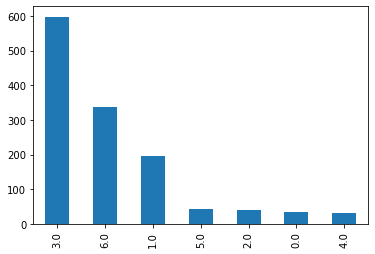

In [284]:
data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [285]:
url_data = data['url']
tit_data = data['title']
y_data = data['label']
print('url 개수: {}'.format(len(url_data)))
print('title 개수: {}'.format(len(tit_data)))
print('label 개수: {}'.format(len(y_data)))

url 개수: 1595
title 개수: 1595
label 개수: 1595


# 불용어 제거 및 토큰화

In [286]:
kr_norm = []
eng_norm = []
for string in tit_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        print(e)
        print('kr title')
    kr_norm.append(tokens)
for string in tit_data.tolist():
    try:
        tokens = re.sub("[^A-Za-z]+", " ", string.lower())
    except Exception as e:
        print(string)
        print(e)
        print('eng title')
    eng_norm.append(tokens)
for string in url_data.tolist():
    try:
        tokens = re.sub("[^A-Za-z]+", " ", string.lower())
    except Exception as e:
        print(string)
        print(e)
        print('eng url')
    eng_norm.append(tokens)

nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr

In [287]:
for sentence in zip(kr_norm, eng_norm):
    print(sentence)

코인시즌 끝나는 줄 알았다 비트코인 갤러리', ' ')
('엘프타야지 이름 졵나예쁘네 비트코인 갤러리', ' ')
(' 텔레그램 이새끼들 돈 한달에 수천만원 그냥 버는거 좃같어 비트코인 갤러리', ' ')
('빗갤 주일 와서 느낀점 비트코인 갤러리', ' ')
('텔레그램 미친방 근황 비트코인 갤러리', ' ')
('비트코인 갤러리', ' ')
('암 수술비 날려먹었다 비트코인 갤러리', ' ')
('어제 누가 토렌트 사라고 해서 사놨는데 비트코인 갤러리', ' ')
('펀디 원에서 익절할까 비트코인 갤러리', ' ')
('코린이 일차 깨달음 비트코인 갤러리', ' ')
(' 만원정도를 그냥주는 친구면 자산이 얼마일거같냐 비트코인 갤러리', ' ')
(' 에서 내 설정을 동기화하려면 어떻게 해야 하나요 ', 'windows bing')
(' 제품 키를 찾는 방법 ', 'windows bing')
(' ', 'nvidia bing')
(' ', 'kakaotalk bing')
(' 두바이왕자 ', ' studio youtube')
(' 비트코인 채굴 ', ' youtube')
('마이닝풀허브에서 이더리움 채굴해보기 네이버 블로그', ' ')
(' 무료 인증서 ', 'https www bing com search q https cvid a e c a a b dcc c ef b aqs edge i j j j pglt form annab pc u ')
(' 편 누구나 쉽게 집에서 비트코인 채굴 가이드 이더리움 전기세 이더리움 그래픽카드 채굴방법 마이닝풀 ', ' youtube')
(' ', 'google bing')
(' ', 'chrome extension api bing')
('컴퓨터 대가 전기세 얼마나와 컴퓨터 본체', ' ')
(' 채굴 팩트만 딱 알려줌 컴퓨터 본체', ' ')
('채굴로 이득볼려면 그래픽카드 최소 몇대 잇어야함 중세게임 갤러리', ' ')
(' 으로 지금부터 채굴하면 한달에 얼마뽑을수있냐 컴퓨터 본체', ' ')
('야 드디어 채굴 달 됐다

In [288]:
kr_stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
eng_stopwords=['https','http','www','com','co','kr','org','ac']#불용어 제거하기

In [289]:
from konlpy.tag import Okt  
okt = Okt()

In [290]:
X_token=[]
for sentence in kr_norm:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in kr_stopwords] # 불용어 제거
    X_token.append(temp_X)

In [291]:
print(X_token[:3])
print(len(X_token))

[['크롬', '확장', '프로그램', '개발', '회고'], ['게', '구리'], ['시종', '설', '제안', '서']]
1595


In [292]:
import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [293]:
ps=PorterStemmer()

stop_words = set(stopwords.words('english'))

stemData=[]
for sentence in eng_norm:
    tokenData = nltk.word_tokenize(sentence)
    tempData = []
    for word in tokenData:  # 불용어 제거
        if word not in stop_words and word not in eng_stopwords:
            word = ps.stem(word)
            if len(word)>1:
                tempData.append(word)
    stemData.append(tempData)

In [294]:
print(X_token[:5])
print(len(X_token))
print(len(stemData))
temp = []
for n,m in zip(X_token,stemData):
    temp.append(n+m)
X_token = temp

[['크롬', '확장', '프로그램', '개발', '회고'], ['게', '구리'], ['시종', '설', '제안', '서'], ['시종', '설', '제안', '서'], []]
1595
3190


In [295]:
print(X_token[:5])
print(len(X_token))

[['크롬', '확장', '프로그램', '개발', '회고'], ['게', '구리', 'twitch'], ['시종', '설', '제안', '서', 'googl', 'doc'], ['시종', '설', '제안', '서', 'googl', 'doc'], ['akaro', 'twitch']]
1595


# 정수 인코딩 수행

In [296]:
max_words = 35000
tokenizer = Tokenizer(num_words = max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_token) 
X_token = tokenizer.texts_to_sequences(X_token)

In [297]:
print(X_token[:3])
print(len(X_token))

[[486, 586, 94, 41, 1108], [146, 1109, 214], [42, 37, 53, 38, 6, 331]]
1595


In [298]:
word_to_index = tokenizer.word_index

In [299]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 2176


# 전체 데이터 길이 분포 확인

train data의 최대 길이 : 32
train data의 최소 길이 : 1
data의 평균 길이 : 6.30846394984326


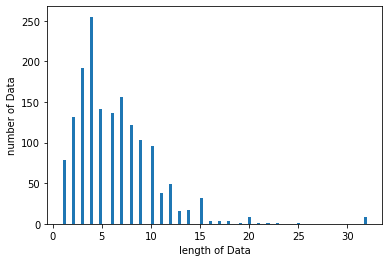

In [300]:
print('train data의 최대 길이 :',max(len(l) for l in X_token))
print('train data의 최소 길이 :',min(len(l) for l in X_token))
print('data의 평균 길이 :',sum(map(len, X_token))/len(X_token))
plt.hist([len(s) for s in X_token], bins=100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [301]:
max_len = max(len(l) for l in X_token)
X_data = pad_sequences(X_token, maxlen=max_len)
print("X data shape: ", X_data.shape)
print("y data shape: ", y_data.shape)

X data shape:  (1595, 32)
y data shape:  (1595,)


In [302]:
y_data = np.array(y_data).reshape(-1, 1)

In [274]:
print(X_data[:3])
print(y_data[:3])

[[ 0  0  0  0  0  8  9 10 11 12]
 [ 0  0  0  0  0  0  0 13 14  1]
 [ 0  0  0  0  2  3  4  5  6  7]]
[[nan]
 [ 1.]
 [ 5.]]


# 데이터 분리

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state=1234)

In [304]:
print(X_train[:3])
print(y_train[:3]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 448   3 175 141   3   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0 356 355 357]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0  10  11   5   9]]
[[ 3.]
 [nan]
 [ 1.]]


# 모델 만들기(loss: 0. - acc: 0.)

In [305]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [306]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Train on 892 samples, validate on 224 samples
Epoch 1/10
892/892 [==============================] - 5s 6ms/sample - loss: nan - acc: 0.0213 - val_loss: nan - val_acc: 0.0357
Epoch 2/10
892/892 [==============================] - 1s 1ms/sample - loss: nan - acc: 0.0191 - val_loss: nan - val_acc: 0.0357
Epoch 3/10
892/892 [==============================] - 1s 1ms/sample - loss: nan - acc: 0.0191 - val_loss: nan - val_acc: 0.0357
Epoch 4/10
892/892 [==============================] - 1s 1ms/sample - loss: nan - acc: 0.0191 - val_loss: nan - val_acc: 0.0357
Epoch 5/10
892/892 [==============================] - 1s 1ms/sample - loss: nan - acc: 0.0191 - val_loss: nan - val_acc: 0.0357
Epoch 6/10
892/892 [==============================] - 1s 2ms/sample - loss: nan - acc: 0.0191 - val_loss: nan - val_acc: 0.0357
Epoch 7/10
892/892 [==============================] - 1s 1ms/sample - loss: nan - acc: 0.0191 - val_loss: nan - val_acc: 0.0357
Epoch 8/10
892/892 [==============================] - 1s 1

In [307]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

479/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

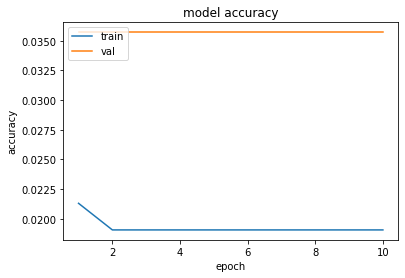

In [308]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

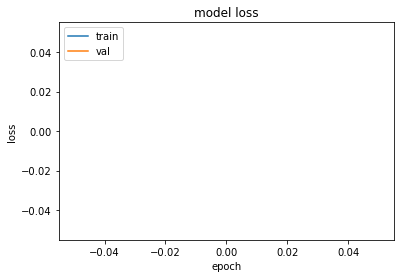

In [309]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()